### California's COVID rate is now twice that of Florida's despite mask mandates

https://www.foxnews.com/us/masked-california-covid-rate-twice-florida?utm_id=41721&sfmc_id=3444094

COVID data: https://dev.socrata.com/foundry/data.cdc.gov/9mfq-cb36

Population data: https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage

In [1]:
import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
client = Socrata("data.cdc.gov", None)

In [17]:
df_fl = client.get("9mfq-cb36", state="FL")
len(df_fl)

663

In [18]:
df_ca = client.get("9mfq-cb36", state="CA")
len(df_ca)

663

In [19]:
select_cols = ["submission_date", "state", "tot_cases", "new_case", "tot_death","new_death"]
number_cols = ["tot_cases", "new_case", "tot_death","new_death"]

In [21]:
dff = pd.DataFrame.from_records(df_fl).sort_values("submission_date")
dff

,submission_date,state,tot_cases,new_case,pnew_case,tot_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
298,2020-01-22T00:00:00.000,FL,0,0,NaN,0,0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
473,2020-01-23T00:00:00.000,FL,0,0.0,NaN,0,0.0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
90,2020-01-24T00:00:00.000,FL,0,0.0,NaN,0,0.0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
563,2020-01-25T00:00:00.000,FL,0,0.0,NaN,0,0.0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
644,2020-01-26T00:00:00.000,FL,0,0.0,NaN,0,0.0,NaN,2020-03-26T16:22:39.452,Not agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...
165,2021-11-10T00:00:00.000,FL,3666136,2537.0,670,60841,7.0,0,2021-11-10T00:00:00.000,Not agree,Not agree
471,2021-11-11T00:00:00.000,FL,3667659,1523.0,535,60843,2.0,0,2021-11-11T00:00:00.000,Not agree,Not agree
235,2021-11-12T00:00:00.000,FL,3669277,1618.0,653,60844,1.0,0,2021-11-12T00:00:00.000,Not agree,Not agree
496,2021-11-13T00:00:00.000,FL,3670422,1145.0,309,60844,0.0,0,2021-11-13T00:00:00.000,Not agree,Not agree


In [22]:
dfc = pd.DataFrame.from_records(df_ca).sort_values("submission_date")
dfc

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
477,2020-01-22T00:00:00.000,CA,0,0.0,0,0,0,0,NaN,NaN,0,0,2020-01-24T00:00:00.000,Agree,Not agree
141,2020-01-23T00:00:00.000,CA,0,0.0,0,0.0,0,0,NaN,NaN,0.0,0,2020-01-25T00:00:00.000,Agree,Not agree
319,2020-01-24T00:00:00.000,CA,0,0.0,0,0.0,0,0,NaN,NaN,0.0,0,2020-01-26T00:00:00.000,Agree,Not agree
597,2020-01-25T00:00:00.000,CA,0,0.0,0,0.0,0,0,NaN,NaN,0.0,0,2020-01-27T00:00:00.000,Agree,Not agree
394,2020-01-26T00:00:00.000,CA,0,0.0,0,0.0,0,0,NaN,NaN,0.0,0,2020-01-28T00:00:00.000,Agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,2021-11-10T00:00:00.000,CA,4963742,4714839.0,248903,3716.0,0,72132,NaN,NaN,134.0,0,2021-11-11T14:27:06.686,Agree,Not agree
515,2021-11-11T00:00:00.000,CA,4972469,4719596.0,252873,8727.0,3970,72288,NaN,NaN,156.0,0,2021-11-12T17:03:41.531,Agree,Not agree
33,2021-11-12T00:00:00.000,CA,4972469,4719596.0,252873,0.0,0,72288,NaN,NaN,0.0,0,2021-11-13T14:31:27.149,Agree,Not agree
537,2021-11-13T00:00:00.000,CA,4984465,4731592.0,252873,11996.0,0,72436,NaN,NaN,148.0,0,2021-11-15T13:35:54.283,Agree,Not agree


In [23]:
def prepare_df(df):
    df = df.loc[df["submission_date"] < '2021-11-11', select_cols]
    df.loc[:,"submission_date"] = pd.to_datetime(df.loc[:,"submission_date"])
    df.loc[:,number_cols] = df[number_cols].astype(float).astype(int)
    df.replace(0, np.nan, inplace=True)
    return df

In [24]:
dff = prepare_df(dff)
dff

,submission_date,state,tot_cases,new_case,tot_death,new_death
298,2020-01-22,FL,NaN,NaN,NaN,NaN
473,2020-01-23,FL,NaN,NaN,NaN,NaN
90,2020-01-24,FL,NaN,NaN,NaN,NaN
563,2020-01-25,FL,NaN,NaN,NaN,NaN
644,2020-01-26,FL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
505,2021-11-06,FL,3659997.0,1426.0,60804.0,7.0
643,2021-11-07,FL,3660268.0,271.0,60820.0,16.0
79,2021-11-08,FL,3662084.0,1816.0,60827.0,7.0
181,2021-11-09,FL,3663599.0,1515.0,60834.0,7.0


In [25]:
dfc = prepare_df(dfc)
dfc

,submission_date,state,tot_cases,new_case,tot_death,new_death
477,2020-01-22,CA,NaN,NaN,NaN,NaN
141,2020-01-23,CA,NaN,NaN,NaN,NaN
319,2020-01-24,CA,NaN,NaN,NaN,NaN
597,2020-01-25,CA,NaN,NaN,NaN,NaN
394,2020-01-26,CA,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
194,2021-11-06,CA,4937188.0,NaN,71852.0,NaN
256,2021-11-07,CA,4937188.0,NaN,71852.0,NaN
230,2021-11-08,CA,4956081.0,18893.0,71979.0,127.0
459,2021-11-09,CA,4960026.0,3945.0,71998.0,19.0


In [26]:
dfp = pd.read_csv("nst-est2019-alldata.csv", usecols=("SUMLEV", "STATE", "NAME", "POPESTIMATE2019"), dtype={"SUMLEV": str, "STATE": str, "NAME": str, "POPESTIMATE2019": int})
dfp.head(10)

,SUMLEV,STATE,NAME,POPESTIMATE2019
0,010,00,United States,328239523
1,020,00,Northeast Region,55982803
2,020,00,Midwest Region,68329004
3,020,00,South Region,125580448
4,020,00,West Region,78347268
5,040,01,Alabama,4903185
6,040,02,Alaska,731545
7,040,04,Arizona,7278717
8,040,05,Arkansas,3017804
9,040,06,California,39512223


In [27]:
dfp = dfp[(dfp["NAME"] == "California") | (dfp["NAME"] == "Florida")]
dfp

,SUMLEV,STATE,NAME,POPESTIMATE2019
9,040,06,California,39512223
14,040,12,Florida,21477737


In [28]:
# 39512223
pcal = dfp[dfp.NAME == 'California']['POPESTIMATE2019'].values[0]
# 21477737
pflo = dfp[dfp.NAME == 'Florida']['POPESTIMATE2019'].values[0]

In [29]:
def adjust_for_population(df, population):
    df2 = df.copy(deep=True)
    for colname in ("new_case", "new_death", "tot_cases", "tot_death"):
        new_colname = f"{colname}_per_100k"
        df2[new_colname] = df2.loc[:, colname] * 100000.0 / population
    return df2

In [30]:
dfcn = adjust_for_population(dfc, pcal)
dfcn

,submission_date,state,tot_cases,new_case,tot_death,new_death,new_case_per_100k,new_death_per_100k,tot_cases_per_100k,tot_death_per_100k
477,2020-01-22,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,2020-01-23,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319,2020-01-24,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,2020-01-25,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,2020-01-26,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
194,2021-11-06,CA,4937188.0,NaN,71852.0,NaN,NaN,NaN,12495.343530,181.847526
256,2021-11-07,CA,4937188.0,NaN,71852.0,NaN,NaN,NaN,12495.343530,181.847526
230,2021-11-08,CA,4956081.0,18893.0,71979.0,127.0,47.815584,0.321420,12543.159113,182.168946
459,2021-11-09,CA,4960026.0,3945.0,71998.0,19.0,9.984252,0.048086,12553.143365,182.217032


In [31]:
dffn = adjust_for_population(dff, pflo)
dffn

,submission_date,state,tot_cases,new_case,tot_death,new_death,new_case_per_100k,new_death_per_100k,tot_cases_per_100k,tot_death_per_100k
298,2020-01-22,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,2020-01-23,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,2020-01-24,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
563,2020-01-25,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,2020-01-26,FL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
505,2021-11-06,FL,3659997.0,1426.0,60804.0,7.0,6.639433,0.032592,17040.887501,283.102452
643,2021-11-07,FL,3660268.0,271.0,60820.0,16.0,1.261772,0.074496,17042.149273,283.176947
79,2021-11-08,FL,3662084.0,1816.0,60827.0,7.0,8.455267,0.032592,17050.604540,283.209539
181,2021-11-09,FL,3663599.0,1515.0,60834.0,7.0,7.053816,0.032592,17057.658356,283.242131


In [34]:
df = pd.concat([dfcn, dffn]).reset_index()
df

,index,submission_date,state,tot_cases,new_case,tot_death,new_death,new_case_per_100k,new_death_per_100k,tot_cases_per_100k,tot_death_per_100k
0,477,2020-01-22,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,141,2020-01-23,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,319,2020-01-24,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,597,2020-01-25,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,394,2020-01-26,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1313,505,2021-11-06,FL,3659997.0,1426.0,60804.0,7.0,6.639433,0.032592,17040.887501,283.102452
1314,643,2021-11-07,FL,3660268.0,271.0,60820.0,16.0,1.261772,0.074496,17042.149273,283.176947
1315,79,2021-11-08,FL,3662084.0,1816.0,60827.0,7.0,8.455267,0.032592,17050.604540,283.209539
1316,181,2021-11-09,FL,3663599.0,1515.0,60834.0,7.0,7.053816,0.032592,17057.658356,283.242131


In [32]:
def draw_combined_chart(df, y_col, y_label, title, file_name):
    sns.set_style("whitegrid")
    sns.set_context("poster", font_scale=1)
    g = sns.lineplot(data=df, x="submission_date", y=y_col, hue="state")
    g.figure.set_figwidth(30)
    g.figure.set_figheight(10)
    plt.title(title)
    plt.xlabel('Submission date')
    plt.ylabel(y_label)
    plt.savefig(file_name)

### Chart with absolute numbers

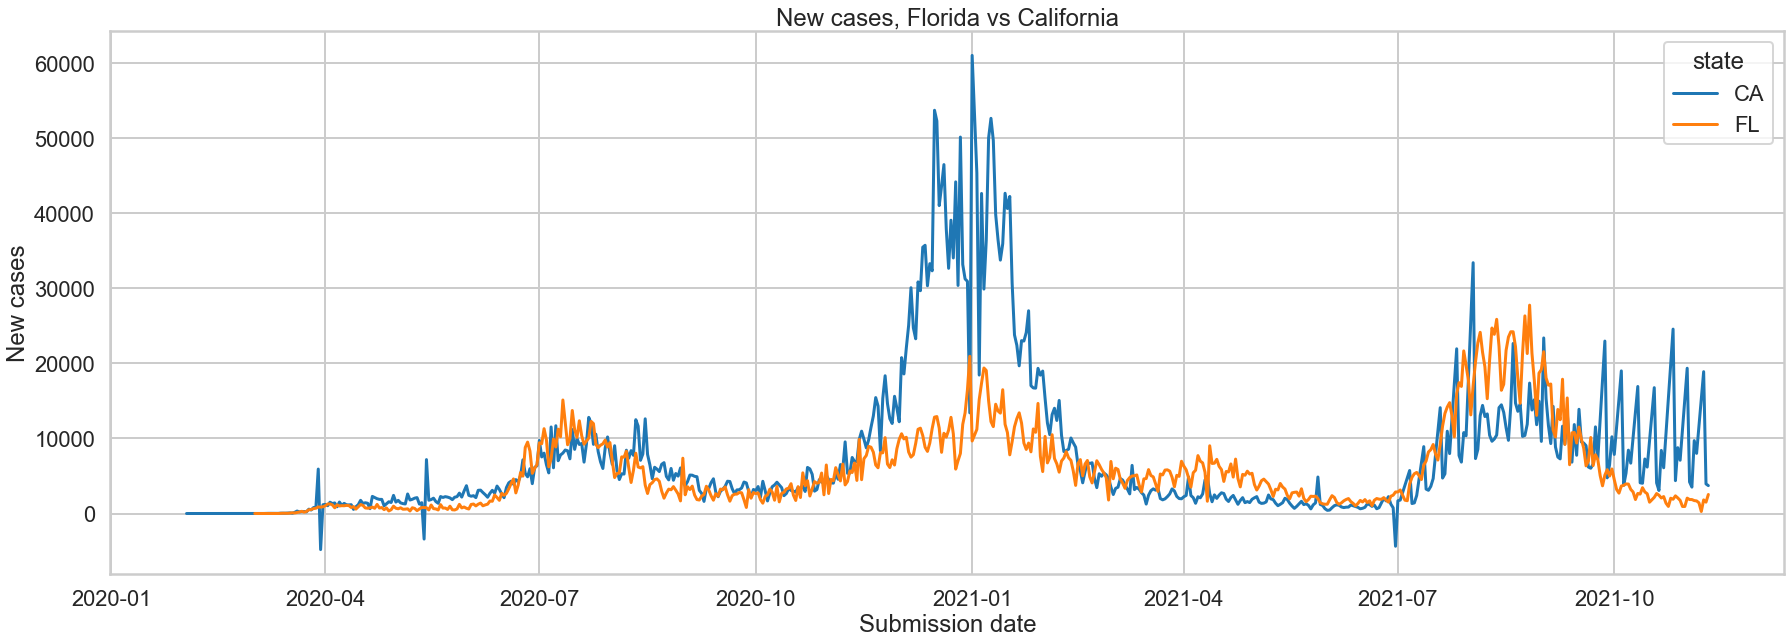

In [35]:
draw_combined_chart(df, "new_case", "New cases", "New cases, Florida vs California", "1_new_cases_abs.png")

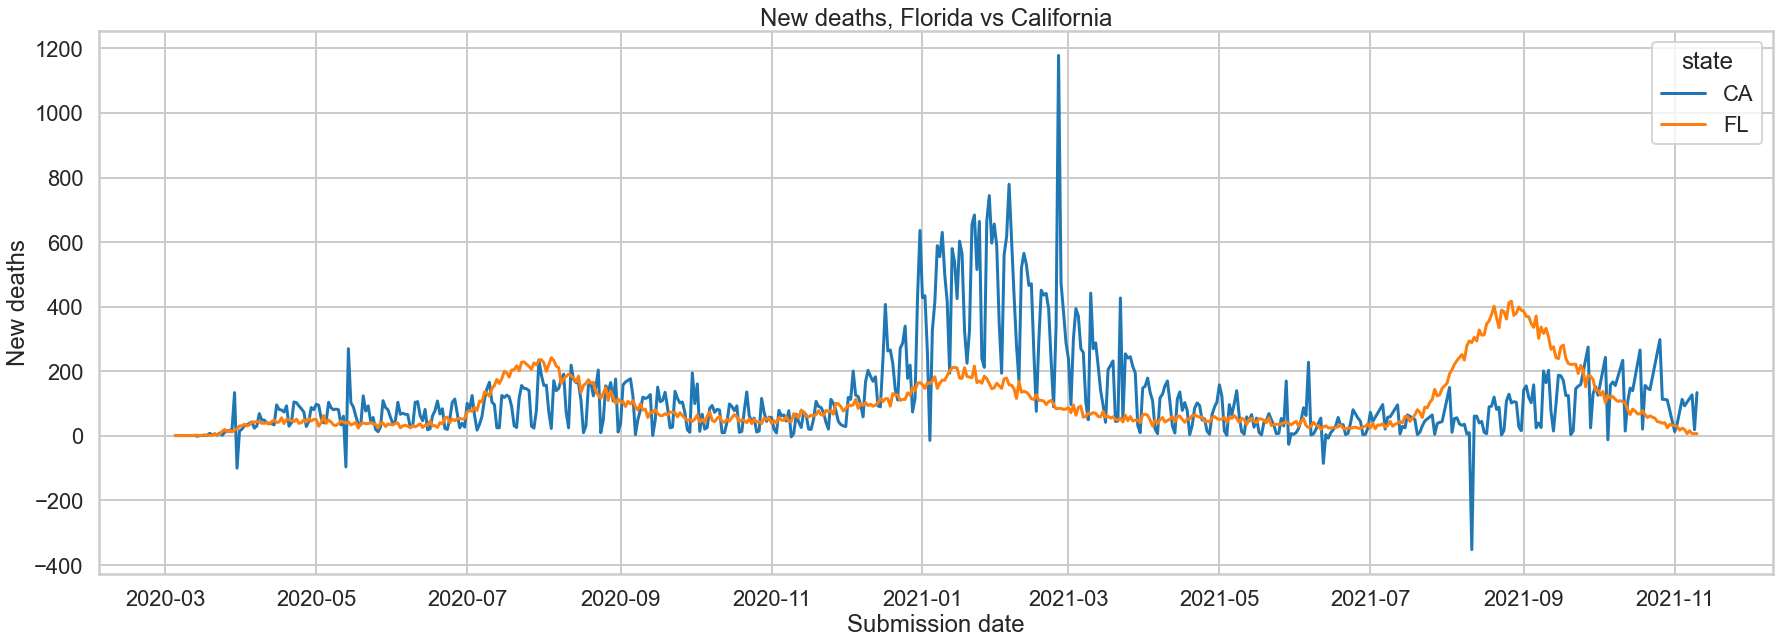

In [36]:
draw_combined_chart(df, "new_death", "New deaths", "New deaths, Florida vs California", "2_new_deaths_abs.png")

### Chart with normalized numbers

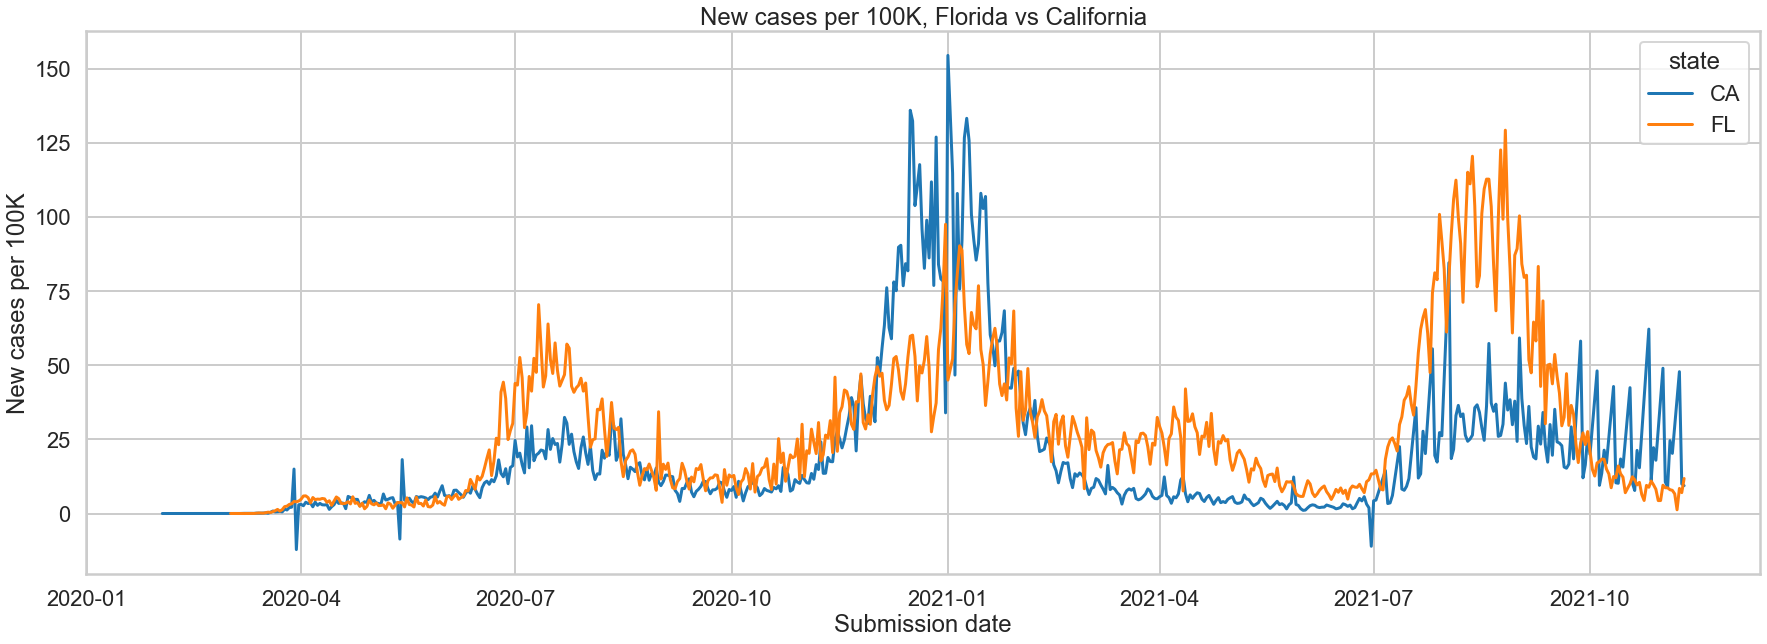

In [37]:
draw_combined_chart(df, "new_case_per_100k", "New cases per 100K", "New cases per 100K, Florida vs California", "3_new_cases_norm.png")

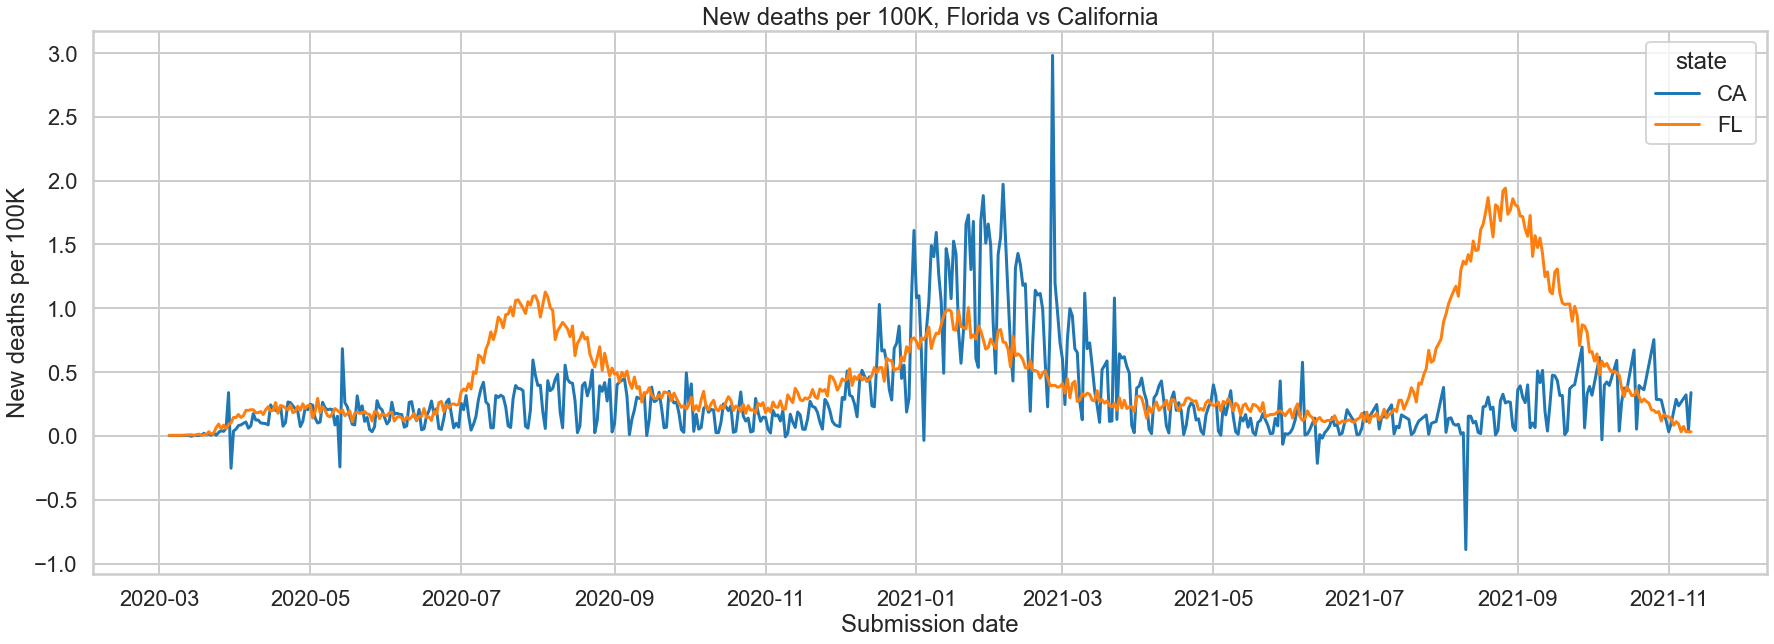

In [38]:
draw_combined_chart(df, "new_death_per_100k", "New deaths per 100K", "New deaths per 100K, Florida vs California", "4_new_deaths_norm.png")

In [71]:
def draw_area_chart(df, y_col, ylabel, title, file_name):
    sns.set_style("whitegrid")
    sns.set_context("poster", font_scale=1)
    g = sns.FacetGrid(df, col="state", hue="state", height=10, aspect=1.5)
    g.map(plt.plot, 'submission_date', y_col)
    g.map(plt.fill_between, 'submission_date', y_col, alpha=0.2)
    g.set_axis_labels("Submission date", ylabel)
    g.set_titles(col_template="{col_name}")
    g.tight_layout()
    plt.subplots_adjust(top=0.92)
    g.fig.suptitle(title)
    plt.savefig(file_name)
    return g

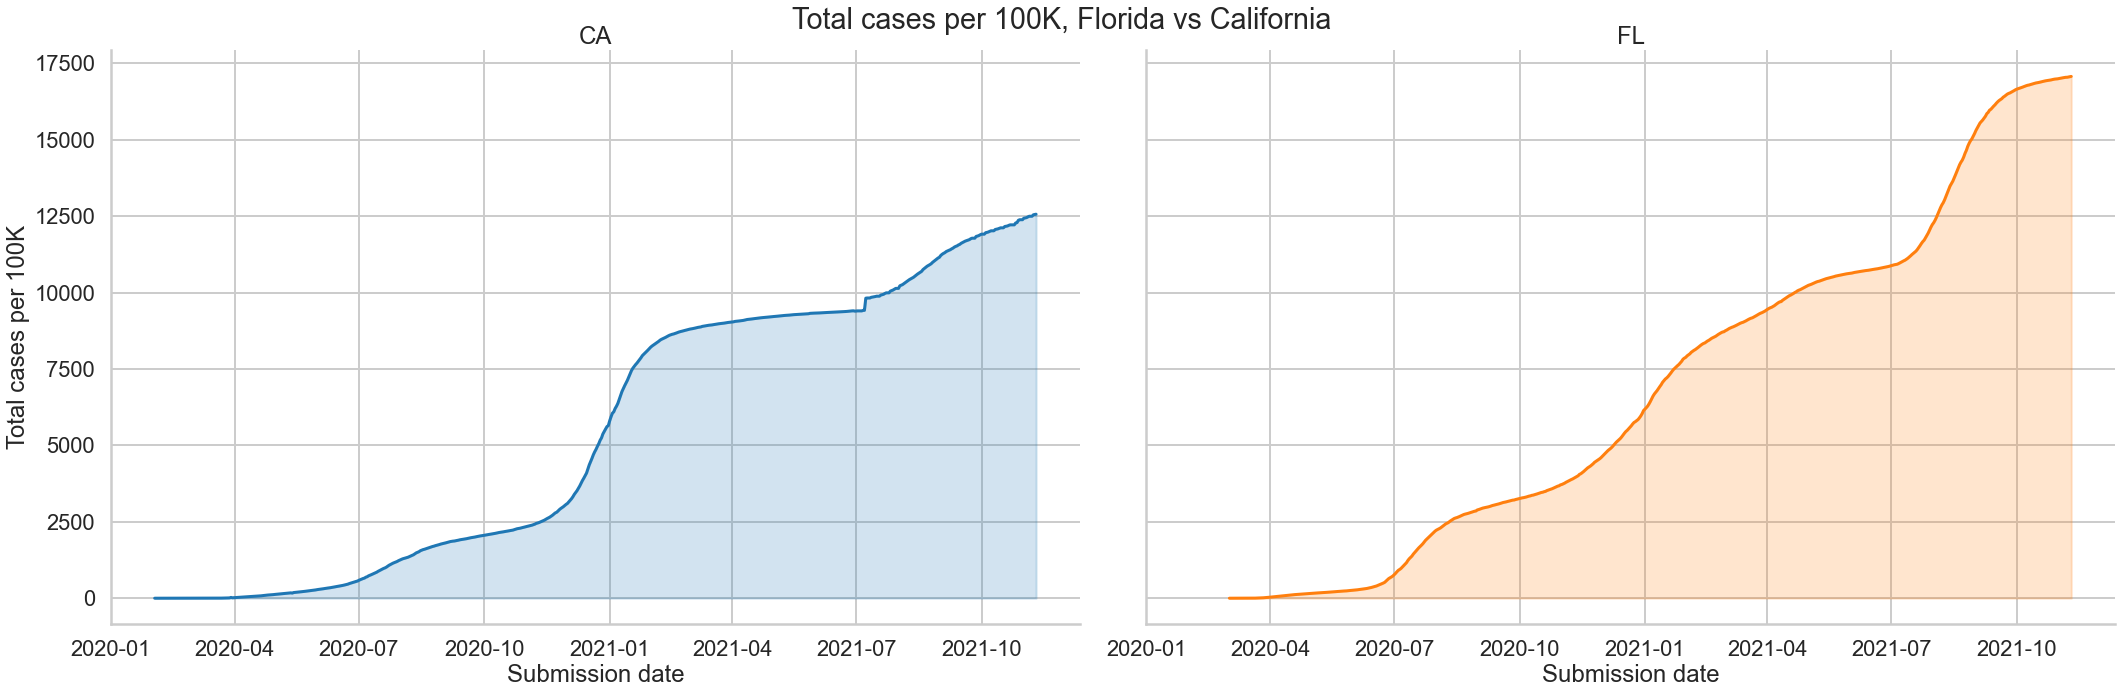

In [72]:
draw_area_chart(df, "tot_cases_per_100k", "Total cases per 100K", "Total cases per 100K, Florida vs California", "5_tot_cases_norm.png")

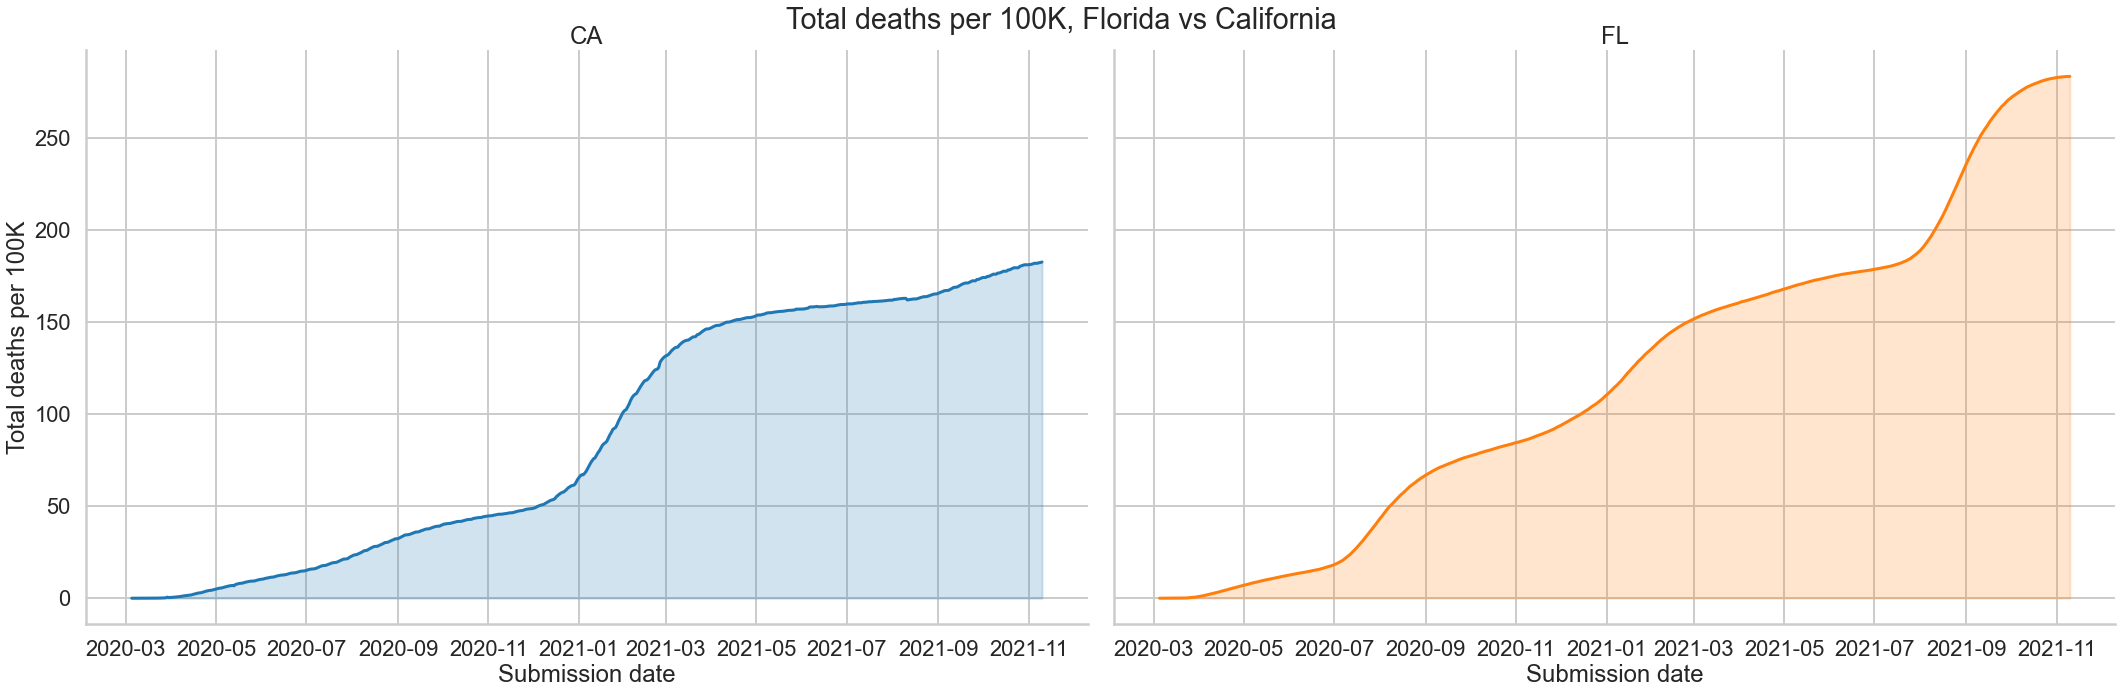

In [74]:
draw_area_chart(df, "tot_death_per_100k", "Total deaths per 100K", "Total deaths per 100K, Florida vs California", "6_tot_deaths_norm.png")

In [192]:
dfcn[dfcn.submission_date == "2021-11-10"]

,submission_date,state,tot_cases,new_case,tot_death,new_death,new_case_per_100k,new_death_per_100k,tot_cases_per_100k,tot_death_per_100k
626,2021-11-10,CA,4963742.0,3716.0,72132.0,134.0,9.404685,0.339136,12562.54805,182.556167


In [193]:
dffn[dffn.submission_date == "2021-11-10"]

,submission_date,state,tot_cases,new_case,tot_death,new_death,new_case_per_100k,new_death_per_100k,tot_cases_per_100k,tot_death_per_100k
490,2021-11-10,FL,3666858.0,2455.0,60420.0,2.0,11.430441,0.009312,17072.832208,281.314554
